In [2]:
!pip install lenstronomy

## importing libraries

C:\Users\DELL\AppData\Local\Temp\ipykernel_20116\2071578342.py:56: RuntimeWarning: divide by zero encountered in log10
  axes[0].matshow(np.log10(np.abs(lensed_image)), origin='lower', cmap='gray')


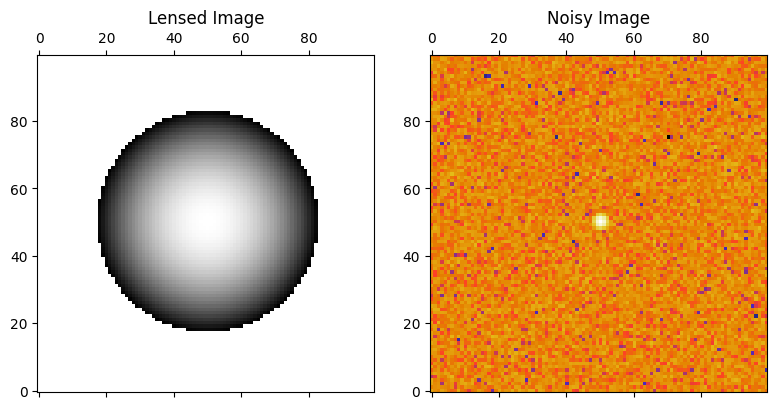

In [78]:
import numpy as np
from lenstronomy.ImSim.image_model import ImageModel
from lenstronomy.PointSource.point_source import PointSource
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.Data.imaging_data import ImageData
from lenstronomy.Data.psf import PSF
from lenstronomy.Util.image_util import add_poisson, add_background
import matplotlib.pyplot as plt

# Define lensing parameters
lens_mass_kg = 2e15 * 1.989e30  # mass of the lens in kg
source_distance_pc = 1039  # distance to the source in parsecs

# Converting lens mass from kg to solar masses
lens_mass = lens_mass_kg / 1.989e30  

# Converting source distance from parsecs to arcseconds
distance_to_observer_pc = 1e6  # assuming observer distance is 1 Mpc (1e6 parsecs)
radial_distance = lens_mass / distance_to_observer_pc
angular_distance_arcsec = source_distance_pc / distance_to_observer_pc * radial_distance * (180 / np.pi) * 3600

# Define lens model with POINT_MASS
lens_model = LensModel(lens_model_list=['POINT_MASS'])

# Seting up the source
point_source = PointSource(point_source_type_list=['LENSED_POSITION'])

# Set up PSF and image data
psf_fwhm = 0.1  # FWHM of the Gaussian PSF in arcseconds
psf = PSF(psf_type='GAUSSIAN', fwhm=psf_fwhm)

# Create a blank image as observed data
num_pix = 100  # number of pixels
ra_at_xy_0, dec_at_xy_0 = -2.5, -2.5  # coordinate in angles (RA/DEC) at the position of the pixel edge (0,0)
transform_pix2angle = np.array([[1, 0], [0, 1]]) * 0.05  # linear translation matrix of a shift in pixel in a shift in coordinates
kwargs_pixel = {'ra_at_xy_0': ra_at_xy_0, 'dec_at_xy_0': dec_at_xy_0, 'transform_pix2angle': transform_pix2angle} 
image_data = ImageData(np.zeros((num_pix, num_pix)), **kwargs_pixel)

# Combine components
image_model = ImageModel(data_class=image_data, psf_class=psf, lens_model_class=lens_model, source_model_class=None, point_source_class=point_source)

# Simulate lensed image
kwargs_lens = [{'theta_E': angular_distance_arcsec}]  # lens model parameters
kwargs_ps = [{'ra_image': [0], 'dec_image': [0], 'point_amp': [100]}]  # point source parameters
lensed_image = image_model.image(kwargs_lens=kwargs_lens, kwargs_ps=kwargs_ps)

In [106]:
# Adding noise
exp_time = 150  # exposure time to quantify the Poisson noise level
background_rms = 0.3  # background rms value
gaussian = add_poisson (lensed_image, exp_time=exp_time)
bkg = add_background(lensed_image, sigma_bkd=background_rms)
image_noisy = lensed_image + bkg + poisson


C:\Users\DELL\AppData\Local\Temp\ipykernel_20116\4277247316.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(lensed_image)), origin='lower', cmap='gist_heat_r')


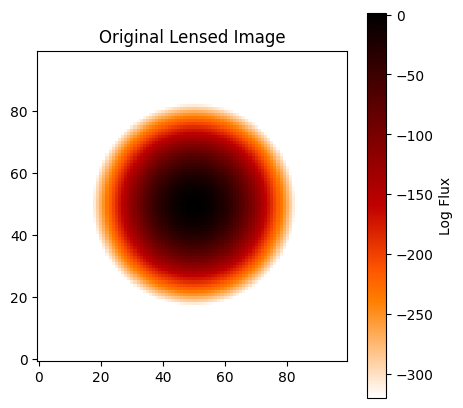

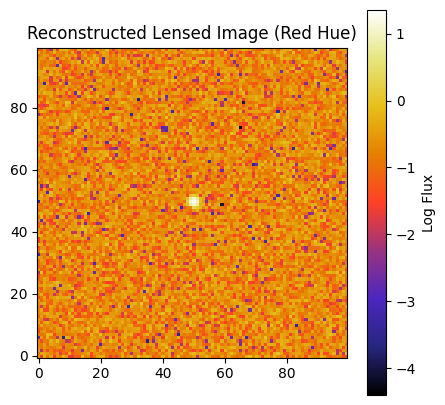

In [107]:
# Plot original lensed image
plt.figure(figsize=(5, 5))
plt.imshow(np.log10(np.abs(lensed_image)), origin='lower', cmap='gist_heat_r')
plt.title("Original Lensed Image")
plt.colorbar(label="Log Flux")
plt.show()

# Plot reconstructed lensed image with a red hue
plt.figure(figsize=(5, 5))
plt.imshow(np.log10(np.abs(image_noisy)), origin='lower', cmap='CMRmap')  # Use 'hot' colormap for a red hue
plt.title("Reconstructed Lensed Image (Red Hue)")
plt.colorbar(label="Log Flux")
plt.show()


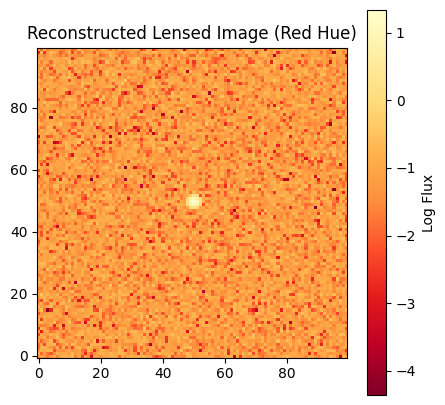

In [93]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define custom colormap from black to red
colors = ['black', 'red']
cmap_red = mcolors.LinearSegmentedColormap.from_list('red_hue', colors)

# Plot reconstructed lensed image with a red hue
plt.figure(figsize=(5, 5))
plt.imshow(np.log10(np.abs(image_noisy)), origin='lower', cmap='YlOrRd_r')
plt.title("Reconstructed Lensed Image (Red Hue)")
plt.colorbar(label="Log Flux")
plt.show()
